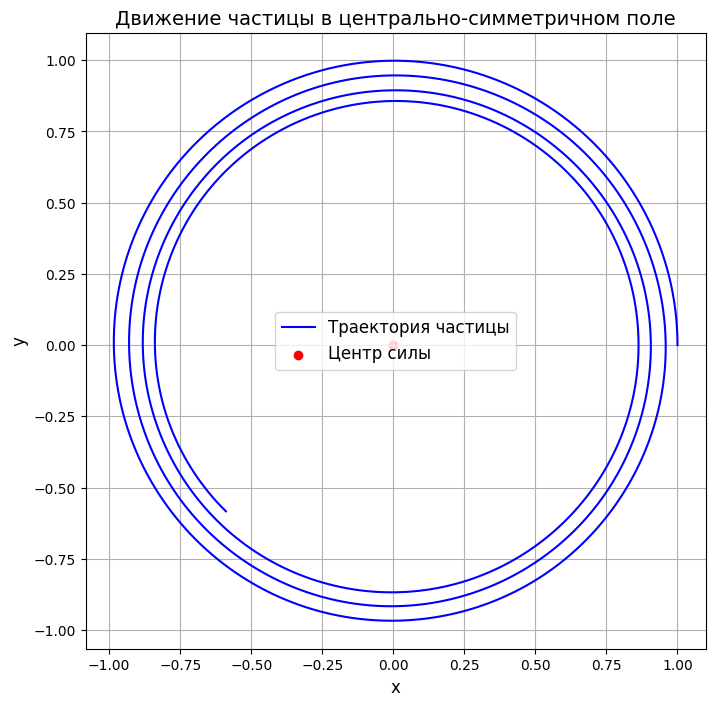

In [2]:
# Импорт необходимых библиотек
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Параметры задачи
m = 1.0  # Масса частицы
k = 1.0  # Коэффициент центральной силы

# Начальные условия
x0, y0 = 1.0, 0.0  # Начальная позиция
vx0, vy0 = 0.0, 1.0  # Начальная скорость

# Диапазон времени
t_span = (0, 20)  # Время от 0 до 20
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Точки для расчета

# Определяем систему дифференциальных уравнений
def central_force(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)  # Расстояние до начала координат
    ax = -k * x / r**3  # Ускорение по x
    ay = -k * y / r**3  # Ускорение по y
    return [vx, vy, ax, ay]

# Начальные состояния
initial_state = [x0, y0, vx0, vy0]

# Решение задачи
solution = solve_ivp(central_force, t_span, initial_state, t_eval=t_eval)

# Извлечение результатов
x, y = solution.y[0], solution.y[1]

# Построение траектории
plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Траектория частицы", color="blue")
plt.scatter(0, 0, color="red", label="Центр силы")  # Центр силы
plt.title("Движение частицы в центрально-симметричном поле", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True)
plt.axis("equal")  # Одинаковый масштаб по осям
plt.legend(fontsize=12)
plt.show()